# Introduction

There is a lot of information on runners and their performance for the
Boston Marathon. Pick a year (post-2012 has more info) and do some
clustering.
Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:

1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).

2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.

3. Do the same things as above for finishing time (which group runs
fastest).

In [21]:
import pandas as pd
import numpy as np # linear algebra
import scipy
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./data.csv")
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [23]:
data.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [24]:
data.describe(include='O')

,10k,name,25k,gender,bib,ctz,35k,state,30k,5k,half,20k,country,city,40k
count,31984,31984,31984,31984,31984,1244,31984,29408,31984,31984,31984,31984,31984,31983,31984
unique,2766,31915,6570,2,31984,84,9516,68,8090,1491,5651,5375,78,5934,10546
top,-,"Sherman, Bonnie",-,M,6374,GBR,-,MA,-,23.93,-,-,USA,Boston,-
freq,50,2,216,17617,1,171,34,7587,40,81,72,51,27233,1034,39


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [26]:
data_male = data[data['gender'] == 'M']
data_female = data[data['gender'] == 'F']

In [27]:
# Data transform 

In [28]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
data[numeric] = data[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)
print(data.dtypes)

10k          float64
name          object
division       int64
25k          float64
gender        object
age          float64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall      float64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object


# Data exploring

In [29]:
## Age 

Text(0.5, 1.0, 'Participants per age group')

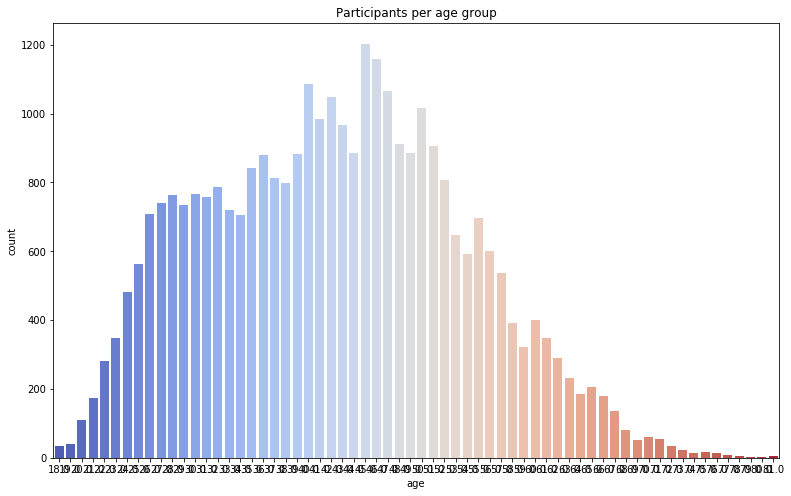

In [30]:
g = sns.countplot('age', data=data, palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Participants per age group")

In [31]:
## Age and gender

Text(0.5, 1.0, 'Participants per Age & Gender')

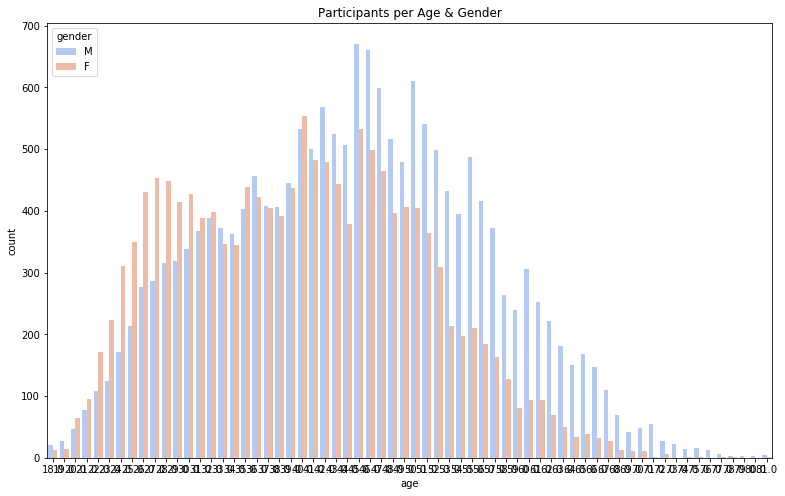

In [32]:
g = sns.countplot('age', data=data, palette="coolwarm", hue='gender')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age & Gender")

In [33]:
## Boxplot by age and gender

Text(0.5, 1.0, 'Distribution of finish times per Age group')

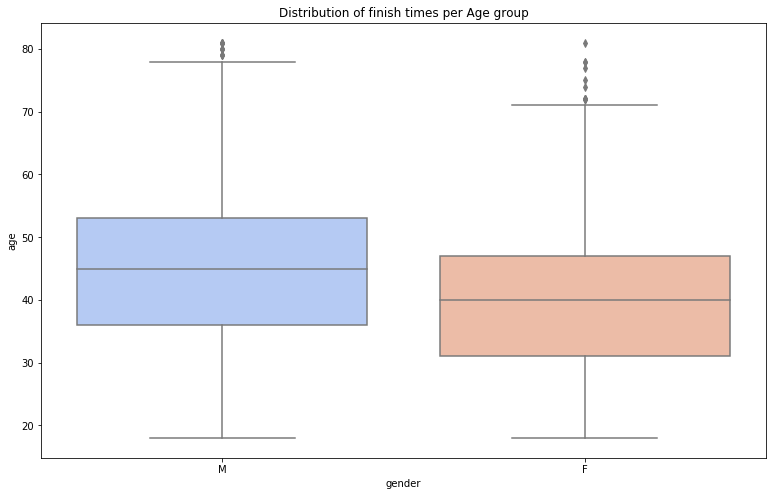

In [34]:
g = sns.boxplot(data['gender'], data['age'], palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Distribution of finish times per Age group")

## Finish time

/Users/hung/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


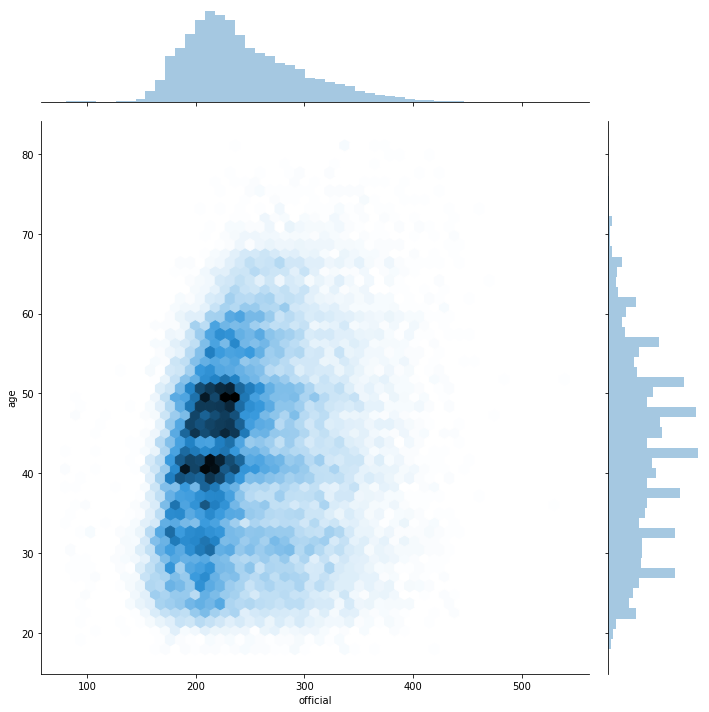

In [35]:
g = sns.jointplot( x=data['official'], y=data['age'], stat_func=None, kind='hex',  size=10)

## Country

Text(0.5, 1.0, 'Most popular Country')

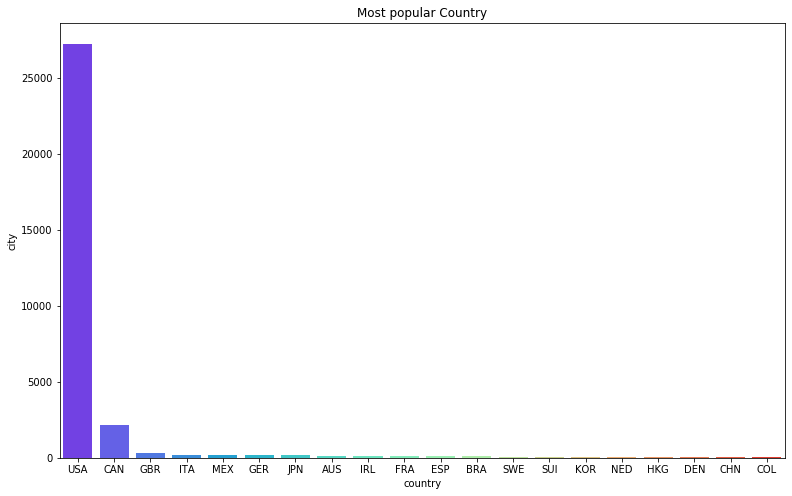

In [36]:
s = data.groupby('country').count()['city'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country")

In [37]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47.0,85.25,W1,8,NaN,71.40,8.0,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33.0,138.95,F1,1,NaN,116.37,21.0,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41.0,80.60,W2,1,NaN,67.42,1.0,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24.0,140.58,F2,3,NaN,116.37,27.0,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40.0,81.23,W3,2,NaN,67.83,2.0,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [38]:
data['gender_bin'] = data['gender']
data['gender_bin'] = data['gender_bin'].str.replace('M','0')
data['gender_bin'] = data['gender_bin'].str.replace('F','1')
data['gender_bin'] = pd.to_numeric(data['gender_bin'], errors='coerce')

drop = ['name','gender','bib','ctz','state','country','city']
numeric.append('gender_bin')
dropna2014 = data.dropna(subset = numeric)
print(len(dropna2014))

numeric2014 = dropna2014.drop(drop, axis=1)
print(numeric2014.dtypes)
print(numeric2014.head())

31649
10k           float64
division        int64
25k           float64
age           float64
official      float64
genderdiv       int64
35k           float64
overall       float64
pace          float64
30k           float64
5k            float64
half          float64
20k           float64
40k           float64
gender_bin      int64
dtype: object
     10k  division    25k   age  official  genderdiv     35k  overall  pace  \
0  17.37         8  47.67  47.0     85.25          8   71.40      8.0  3.27   
1  32.58         1  82.43  33.0    138.95          1  116.37     21.0  5.30   
2  16.62         1  45.80  41.0     80.60          1   67.42      1.0  3.08   
3  32.57         3  82.43  24.0    140.58          3  116.37     27.0  5.37   
4  17.12         2  46.37  40.0     81.23          2   67.83      2.0  3.10   

     30k     5k   half    20k     40k  gender_bin  
0  59.18   8.02  39.72  37.65   80.43           0  
1  99.33  16.22  69.47  65.83  132.10           1  
2  56.45   7.75  38

In [39]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

X = data[[ 'official', 'age']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

NameError: name 'KMeans' is not defined

In [40]:
def evaluate_kmeans(data, clust_range):
    plot_clusters = pd.DataFrame()
    cluster_scores = pd.DataFrame(columns=['clusters','mean score','std'])


    plot_clusters['pca_f1' + '_sample' ] = data[1][:, 0]
    plot_clusters['pca_f2' + '_sample' ] = data[1][:, 1]

    for nclust in range(2, clust_range):
        km = KMeans(n_clusters=nclust, random_state=42)
        km.fit(data)
        labels = km.labels_
        cluster_pred = km.predict(data)
        plot_clusters['clust' + str(nclust) + '_sample'] = cluster_pred
        plot_clusters['sil_score_' + 'clust'+ str(nclust) + '_sample'] = metrics.silhouette_score(data, labels, metric='euclidean')
            
    for nclust in range(2, clust_range):

        colors = cm.rainbow(np.linspace(0, 1, nclust))
        f, plotgrid = plt.subplots(2, 2)
        sil_scores = []
        
#         for i in range(4):
        i = 0

        current_group = (f'clust{nclust}_sample{i}')

        x_plot = plot_clusters[f'pca_f1_sample{i}']
        y_plot = plot_clusters[f'pca_f2_sample{i}']

        c = plot_clusters[current_group]

        rows = int(np.floor(i / 2))
            # 0,0,1,1
        cols = i % 2
            # 0,1,0,1

        plotgrid[rows, cols].scatter(x_plot, y_plot, color = colors[c], alpha = 0.4)
        plotgrid[rows, cols].set_title(f'sample {i}')
        plotgrid[rows, cols].set_xlim([-.3, .3])
        plotgrid[rows, cols].set_ylim([-.3, .3])

        sil_score = plot_clusters['sil_score_' + str(current_group)].mean()
        sil_scores.append(sil_score)

        group_sil_scores_mean = np.mean(sil_scores)
        group_sil_scores_std = np.std(sil_scores)
        cluster_scores = cluster_scores.append({'clusters':int(nclust), 'mean score': group_sil_scores_mean, 'std': group_sil_scores_std}, ignore_index=True)
        print('scores:')
        print(cluster_scores)

        plt.suptitle(f'{nclust} Clusters', fontsize=20)
        plt.tight_layout()
        plt.show()
        print('\n')
    print('sorted cluster scores:')
    sorted_scores = cluster_scores.sort(columns = 'mean score', ascending = False)
    print(sorted_scores)

    best_cluster_num = int(sorted_scores['clusters'].iloc[0])
    print('best cluster num:')
    print(best_cluster_num)
    
    return best_cluster_num

In [41]:
continuous2014_best_cluster_num = evaluate_kmeans(numeric2014, 21)


KeyError: 1

In [ ]:
kmeans.labels_

In [ ]:
X['label'] = kmeans.labels_
plt.figure(figsize = (10,10))
for label in X.label.unique():
    plt.plot(X.official[X.label == label],X.age[X.label == label],'.',  markersize = 0.3)

plt.title('Clusters of New York')
plt.show()

In [ ]:
loc_df = X
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df.label.unique():
    ax.plot(loc_df.age[loc_df.label == label],loc_df.official[loc_df.label == label],'.', alpha = 0.4, markersize = 0.1)
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers')
plt.show()